## Multiple Disease Prediction

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Liver Disease Dataset

In [ ]:
# Assigning data
df_liver = pd.read_csv('Data/indian_liver_patient.csv')
df_liver

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [109]:
# Describing the data
df_liver.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [110]:
# Checking the sum of nul values in the dataset
df_liver.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [111]:
# Handle missing values in 'Albumin_and_Globulin_Ratio'
mean_value = round(df_liver['Albumin_and_Globulin_Ratio'].mean(), 2)
df_liver['Albumin_and_Globulin_Ratio'] = df_liver['Albumin_and_Globulin_Ratio'].fillna(mean_value)

In [112]:
# Checking the sum of nul values in the dataset
df_liver.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [113]:
# Checking the column
df_liver['Albumin_and_Globulin_Ratio']

0      0.90
1      0.74
2      0.89
3      1.00
4      0.40
       ... 
578    0.37
579    1.10
580    1.00
581    1.00
582    1.50
Name: Albumin_and_Globulin_Ratio, Length: 583, dtype: float64

In [114]:
# Encoding the data of Gender Column
df_liver['Gender'] = df_liver['Gender'].map({'Female':0,'Male':1})

`'Male':1`
`'Female':0`

In [115]:
# Encoding the data, ! for disease and 0 for not disease
df_liver['Dataset'] = df_liver['Dataset'].map({2: 0,1: 1 })

`1: 1 --> Disease`
` 2: 0 --> No Disease`

In [116]:
df_liver

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [117]:
# Converting the preprocessed data to CSV.
df_liver.to_csv('Liver_Preprocessed.csv')

### EDA

In [118]:
# Checking the disease between Gender
Disease = (df_liver['Dataset'].value_counts(normalize=True)*100)
Disease

Dataset
1    71.35506
0    28.64494
Name: proportion, dtype: float64

### Observation
71.35% of People are having Liver Disease, Rest of them 28.64% are normal.

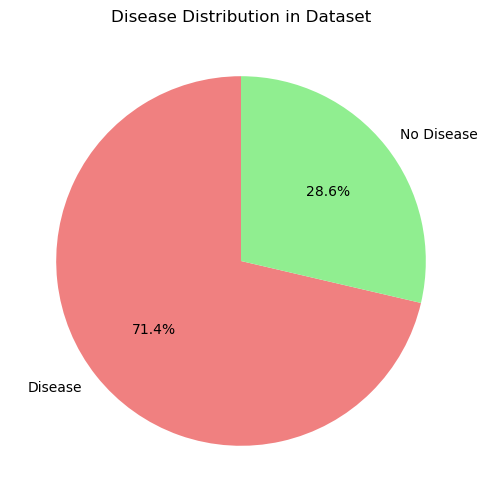

In [122]:
# Pie Chart
# Correct labels (1 = Disease, 2 = No Disease)
labels = ['Disease', 'No Disease']

plt.figure(figsize=(6,6))
plt.pie(Disease, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral','lightgreen'])
plt.title("Disease Distribution in Dataset")
plt.show()


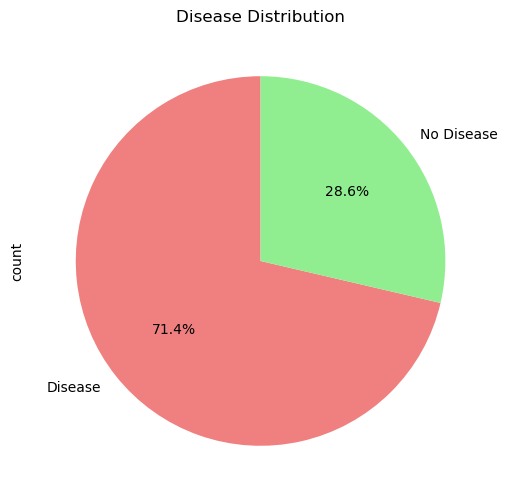

In [126]:
# Target Distribution
plt.figure(figsize=(6,6))
df_liver['Dataset'].value_counts().plot.pie(
    labels=['Disease','No Disease'],   # Since 1 = Disease, 0 = No Disease
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightcoral','lightgreen'])
plt.title("Disease Distribution")
plt.show()

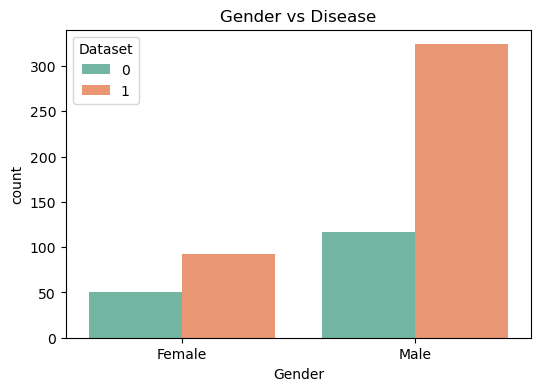

In [127]:
# Gender vs Disease

plt.figure(figsize=(6,4))
sns.countplot(data=df_liver, x='Gender', hue='Dataset', palette='Set2')
plt.xticks([0,1], ['Female','Male'])   # Because we encoded Male=1, Female=0
plt.title("Gender vs Disease")
plt.show()

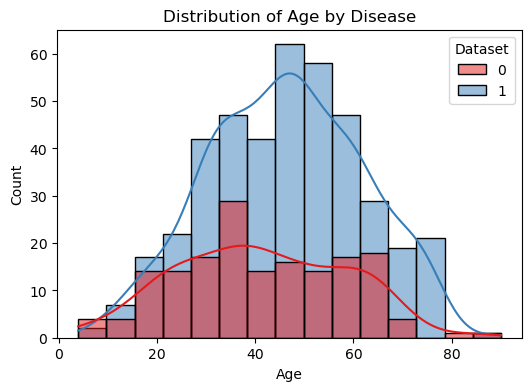

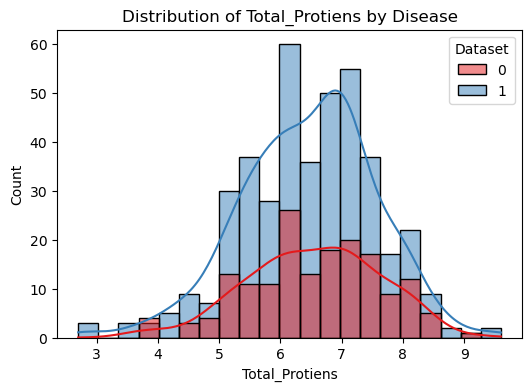

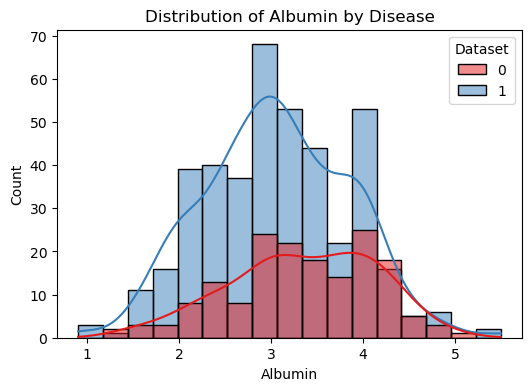

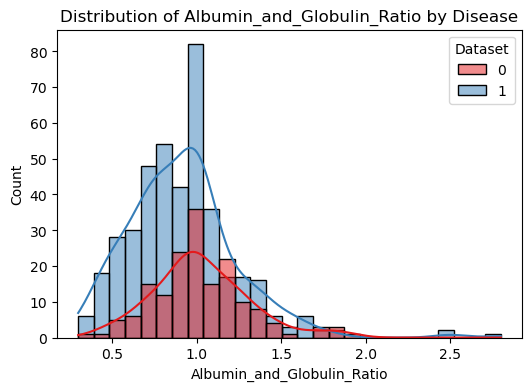

In [130]:
# Numerical Distributions by Disease
num_cols = ['Age','Total_Protiens',
            'Albumin','Albumin_and_Globulin_Ratio']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data=df_liver, x=col, hue='Dataset', kde=True, palette='Set1')
    plt.title(f"Distribution of {col} by Disease")
    plt.show()

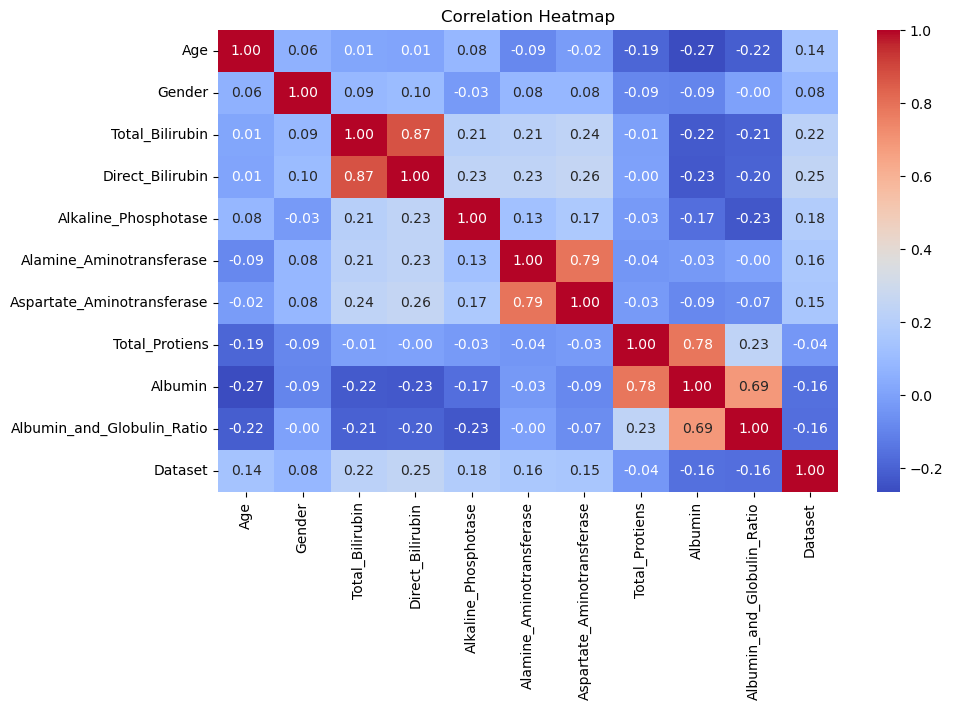

In [129]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df_liver.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### `Data of Liver Disease has been preprocessed and now we can use it for Training the model.`

# 2. Kidney Disease Dataset

In [ ]:
# Assigning data
df_kidney = pd.read_csv('Data/kidney_disease.csv')
df_kidney

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [ ]:
# Clean Column Names & Data
df_kidney.columns = df_kidney.columns.str.strip()
df_kidney['dm'] = df_kidney['dm'].str.strip()
df_kidney['cad'] = df_kidney['cad'].str.strip()

In [ ]:
# Replace '?' or NAN with numeric value
df_kidney.replace('?', np.nan, inplace=True)

In [ ]:
# Drop id
df_kidney.drop('id', axis=1, inplace=True)

In [ ]:
# Converting Categorical to Numeric data
numeric_cols = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
for col in numeric_cols:
    df_kidney[col] = pd.to_numeric(df_kidney[col], errors='coerce') # 'coerce' will turn invalid parsing into NaN

C:\Users\Mayank Meghwal\AppData\Local\Temp\ipykernel_22832\3735350539.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_kidney[col].fillna(mean_val, inplace=True)
C:\Users\Mayank Meghwal\AppData\Local\Temp\ipykernel_22832\3735350539.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [ ]:
# Fill Missing values
for col in numeric_cols:
    mean_val = round(df_kidney[col].mean(), 2)
    df_kidney[col].fillna(mean_val, inplace=True)

In [ ]:
# For Categorical columns, we are using mode
for col in df_kidney.select_dtypes(include='object').columns:
    df_kidney[col].fillna(df_kidney[col].mode()[0], inplace=True)

In [ ]:
# Encode Categorical Columns
df_kidney = pd.get_dummies(df_kidney, drop_first=True)

print("\nColumns AFTER one-hot encoding:")
print(df_kidney.columns)

Columns BEFORE one-hot encoding:
Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')
------------------------------

Columns AFTER one-hot encoding:
Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc', 'rbc_normal', 'pc_normal', 'pcc_present',
       'ba_present', 'htn_yes', 'dm_yes', 'cad_yes', 'appet_poor', 'pe_yes',
       'ane_yes', 'classification_notckd'],
      dtype='object')
------------------------------


In [205]:
df_kidney

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,classification_notckd
0,48.0,80.0,1.020,1.0,0.0,121.00,36.0,1.2,137.53,4.63,...,True,False,False,True,True,False,False,False,False,False
1,7.0,50.0,1.020,4.0,0.0,148.04,18.0,0.8,137.53,4.63,...,True,False,False,False,False,False,False,False,False,False
2,62.0,80.0,1.010,2.0,3.0,423.00,53.0,1.8,137.53,4.63,...,True,False,False,False,True,False,True,False,True,False
3,48.0,70.0,1.005,4.0,0.0,117.00,56.0,3.8,111.00,2.50,...,False,True,False,True,False,False,True,True,True,False
4,51.0,80.0,1.010,2.0,0.0,106.00,26.0,1.4,137.53,4.63,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.00,49.0,0.5,150.00,4.90,...,True,False,False,False,False,False,False,False,False,True
396,42.0,70.0,1.025,0.0,0.0,75.00,31.0,1.2,141.00,3.50,...,True,False,False,False,False,False,False,False,False,True
397,12.0,80.0,1.020,0.0,0.0,100.00,26.0,0.6,137.00,4.40,...,True,False,False,False,False,False,False,False,False,True
398,17.0,60.0,1.025,0.0,0.0,114.00,50.0,1.0,135.00,4.90,...,True,False,False,False,False,False,False,False,False,True


In [206]:
df_kidney.isnull().sum()

age                       0
bp                        0
sg                       47
al                       46
su                       49
bgr                       0
bu                        0
sc                        0
sod                       0
pot                       0
hemo                      0
pcv                       0
wc                        0
rc                        0
rbc_normal                0
pc_normal                 0
pcc_present               0
ba_present                0
htn_yes                   0
dm_yes                    0
cad_yes                   0
appet_poor                0
pe_yes                    0
ane_yes                   0
classification_notckd     0
dtype: int64

In [207]:
columns = ['al','sg','su']
for col in columns:
    mean_val = round(df_kidney[col].mean(), 2)
    df_kidney[col] = df_kidney[col].fillna(mean_val)

In [208]:
df_kidney

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,classification_notckd
0,48.0,80.0,1.020,1.0,0.0,121.00,36.0,1.2,137.53,4.63,...,True,False,False,True,True,False,False,False,False,False
1,7.0,50.0,1.020,4.0,0.0,148.04,18.0,0.8,137.53,4.63,...,True,False,False,False,False,False,False,False,False,False
2,62.0,80.0,1.010,2.0,3.0,423.00,53.0,1.8,137.53,4.63,...,True,False,False,False,True,False,True,False,True,False
3,48.0,70.0,1.005,4.0,0.0,117.00,56.0,3.8,111.00,2.50,...,False,True,False,True,False,False,True,True,True,False
4,51.0,80.0,1.010,2.0,0.0,106.00,26.0,1.4,137.53,4.63,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.00,49.0,0.5,150.00,4.90,...,True,False,False,False,False,False,False,False,False,True
396,42.0,70.0,1.025,0.0,0.0,75.00,31.0,1.2,141.00,3.50,...,True,False,False,False,False,False,False,False,False,True
397,12.0,80.0,1.020,0.0,0.0,100.00,26.0,0.6,137.00,4.40,...,True,False,False,False,False,False,False,False,False,True
398,17.0,60.0,1.025,0.0,0.0,114.00,50.0,1.0,135.00,4.90,...,True,False,False,False,False,False,False,False,False,True


In [209]:
df_kidney.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc', 'rbc_normal', 'pc_normal', 'pcc_present',
       'ba_present', 'htn_yes', 'dm_yes', 'cad_yes', 'appet_poor', 'pe_yes',
       'ane_yes', 'classification_notckd'],
      dtype='object')

In [210]:
df_kidney

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes,classification_notckd
0,48.0,80.0,1.020,1.0,0.0,121.00,36.0,1.2,137.53,4.63,...,True,False,False,True,True,False,False,False,False,False
1,7.0,50.0,1.020,4.0,0.0,148.04,18.0,0.8,137.53,4.63,...,True,False,False,False,False,False,False,False,False,False
2,62.0,80.0,1.010,2.0,3.0,423.00,53.0,1.8,137.53,4.63,...,True,False,False,False,True,False,True,False,True,False
3,48.0,70.0,1.005,4.0,0.0,117.00,56.0,3.8,111.00,2.50,...,False,True,False,True,False,False,True,True,True,False
4,51.0,80.0,1.010,2.0,0.0,106.00,26.0,1.4,137.53,4.63,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.00,49.0,0.5,150.00,4.90,...,True,False,False,False,False,False,False,False,False,True
396,42.0,70.0,1.025,0.0,0.0,75.00,31.0,1.2,141.00,3.50,...,True,False,False,False,False,False,False,False,False,True
397,12.0,80.0,1.020,0.0,0.0,100.00,26.0,0.6,137.00,4.40,...,True,False,False,False,False,False,False,False,False,True
398,17.0,60.0,1.025,0.0,0.0,114.00,50.0,1.0,135.00,4.90,...,True,False,False,False,False,False,False,False,False,True


### EDA

C:\Users\Mayank Meghwal\AppData\Local\Temp\ipykernel_22832\1081158235.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="classification_notckd", data=df_kidney, palette="Set2")


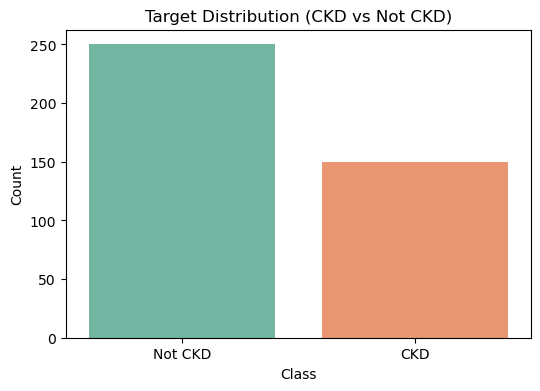

In [ ]:
# Count Plot
plt.figure(figsize=(6,4))
sns.countplot(x="classification_notckd", data=df_kidney, palette="Set2")

plt.title("Target Distribution (CKD vs Not CKD)")
plt.xticks([0, 1], ["Not CKD", "CKD"])

plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


In [214]:
Ckd = df_kidney['classification_notckd'].value_counts(normalize=True)*100
Ckd

classification_notckd
False    62.5
True     37.5
Name: proportion, dtype: float64

`62.5% do not have Chronic Kidney Disease`

`37.5% have Chronic Kidney Disease`

C:\Users\Mayank Meghwal\AppData\Local\Temp\ipykernel_22832\1995785579.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_kidney, palette="viridis")
C:\Users\Mayank Meghwal\AppData\Local\Temp\ipykernel_22832\1995785579.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_kidney, palette="viridis")
C:\Users\Mayank Meghwal\AppData\Local\Temp\ipykernel_22832\1995785579.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df_kidney, palette="viridis")
C:\Users\Mayank Meghwal\AppData\Local\Temp\ipyker

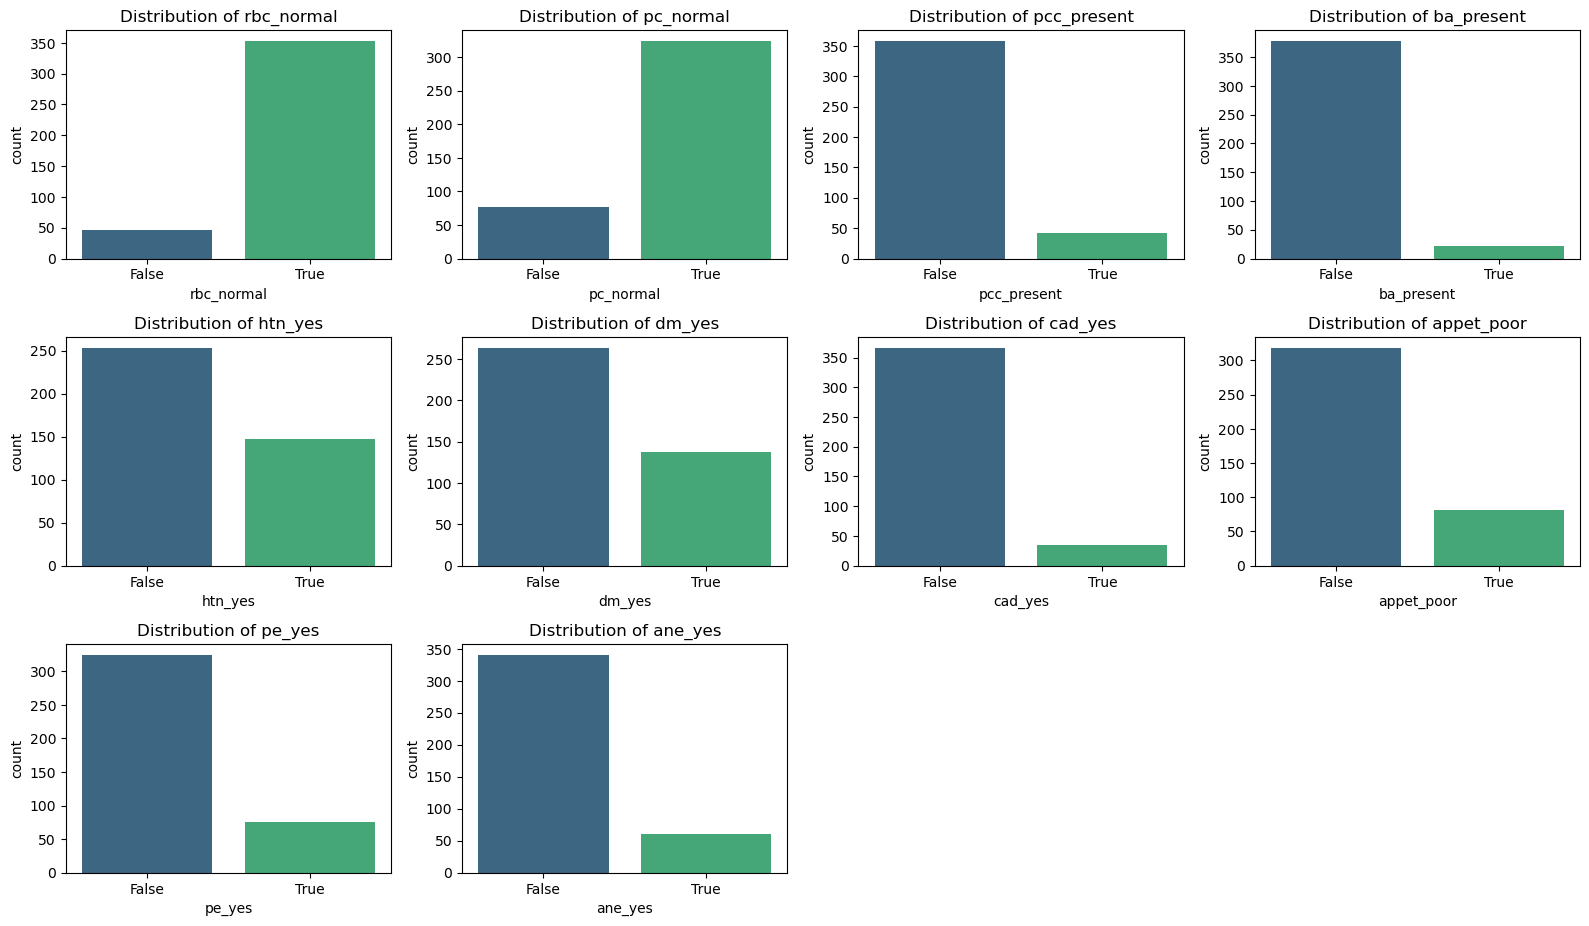

In [221]:
# Categorical Features Distribution
cat_cols = ['rbc_normal','pc_normal','pcc_present','ba_present',
            'htn_yes','dm_yes','cad_yes','appet_poor','pe_yes','ane_yes']

plt.figure(figsize=(16,12))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4,4,i)
    sns.countplot(x=col, data=df_kidney, palette="viridis")
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

In [223]:
# Preprocessed Data of Kidney
df_kidney.to_csv('Kidney_Preprocessed.csv')

### `Data of Kidney Disease has been preprocessed and now we can use it for Training the model.`

# 3. Parkinson Data

In [ ]:
# Assigning data
df_parkinson = pd.read_csv('Data/Parkinsons.csv')
df_parkinson

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [10]:
# Drop non-informative column
df_parkinson = df_parkinson.drop(columns=["name"])

In [11]:
df_parkinson.isnull().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [12]:
# Handle missing values
# Replace "?" with NaN (if present)
df_parkinson.replace("?", np.nan, inplace=True)

# Convert numeric columns properly
for col in df_parkinson.columns:
    df_parkinson[col] = pd.to_numeric(df_parkinson[col], errors='coerce')

# Fill NaNs in numeric columns with median
df_parkinson = df_parkinson.fillna(df_parkinson.median())

In [13]:
# Handle the column
col = "MDVP:Jitter(Abs)"

# 1. Remove extra spaces from column names
df_parkinson.columns = df_parkinson.columns.str.strip()

# 2. Ensure values are numeric (convert scientific notation strings to floats)
df_parkinson['MDVP:Jitter(Abs)'] = pd.to_numeric(df_parkinson[col], errors="coerce")

# 3. Handle missing or invalid values
df_parkinson[col] = df_parkinson[col].fillna(df_parkinson[col].median())

In [14]:
df_parkinson


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [15]:
df_parkinson.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

In [16]:
df_parkinson.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


### EDA

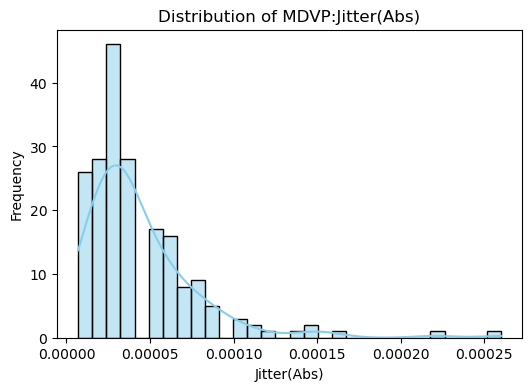

In [17]:
# Distribution of Jitter(Abs)
plt.figure(figsize=(6,4))
sns.histplot(df_parkinson["MDVP:Jitter(Abs)"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of MDVP:Jitter(Abs)")
plt.xlabel("Jitter(Abs)")
plt.ylabel("Frequency")
plt.show()


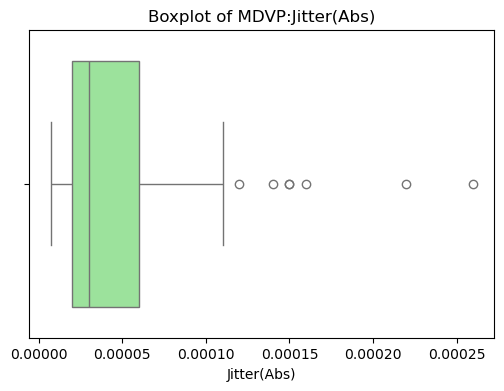

In [18]:

# Boxplot for Outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=df_parkinson["MDVP:Jitter(Abs)"], color="lightgreen")
plt.title("Boxplot of MDVP:Jitter(Abs)")
plt.xlabel("Jitter(Abs)")
plt.show()



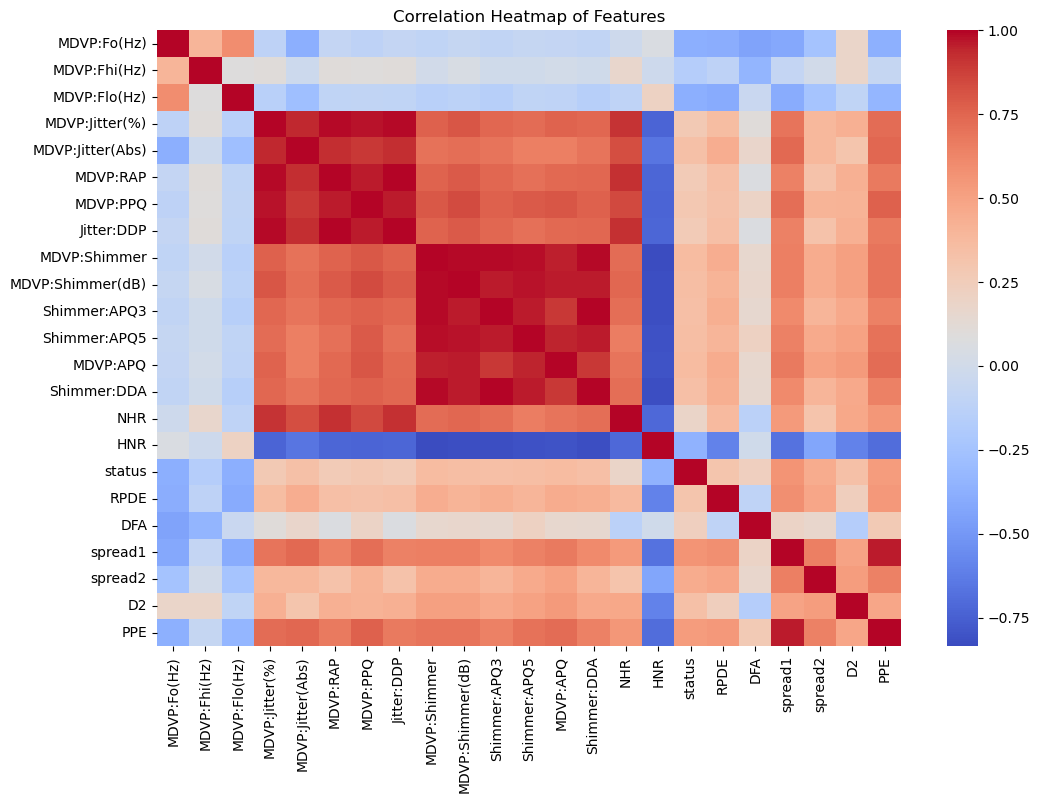

In [19]:
# Correlation Heatmap
plt.figure(figsize=(12,8))
corr = df_parkinson.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()



C:\Users\Mayank Meghwal\AppData\Local\Temp\ipykernel_25824\2835529944.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="status", data=df_parkinson, palette="Set2")


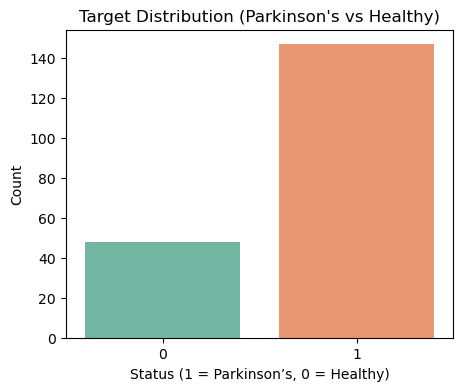

In [21]:
# Target Distribution
# (assuming 'status' is target: 1=Parkinson’s, 0=Healthy)

if "status" in df_parkinson.columns:
    plt.figure(figsize=(5,4))
    sns.countplot(x="status", data=df_parkinson, palette="Set2")
    plt.title("Target Distribution (Parkinson's vs Healthy)")
    plt.xlabel("Status (1 = Parkinson’s, 0 = Healthy)")
    plt.ylabel("Count")
    plt.show()

In [22]:
status = df_parkinson['status'].value_counts(normalize=True)*100
status

status
1    75.384615
0    24.615385
Name: proportion, dtype: float64

Observation:

`75.38% have Parkinson`
`24.61% are Normal`

In [ ]:
df_parkinson.to_csv('Parkinson_preprocessed.csv')

### `Data of Parkinson has been preprocessed and now we can use it for Training the model.`